In [116]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as np
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

from brownian_motion import *
from technical_analysis import rolling_mean
from graph import *
from mean_price_indicators import *

Text(0.5, 1.0, 'Realisations du sous-jacent')

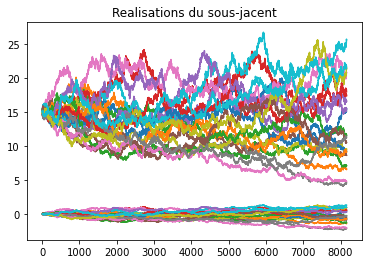

In [106]:
T=1 # temps final
N=255*8*4
dt=T/N
timerange = np.linspace(0,T,N+1,endpoint=True)
timerange=timerange[:,None]


M=20 #no de realisations
#construction de Wt:
Wt, _ = create_brownian_motion(maturity = T, steps = N, no_realisations = M)

plt.plot(Wt)
plt.title('Realisations du brownien')

S0 = 15.0
mu = 0.001
sigma = 0.5
taux_r = 0.05

St = underlying_asset(S0, mu, sigma, timerange, Wt)
# Formule : S0*np.exp( (mu-sigma**2.0/2.0)*t+ sigma*Wt)

plt.plot(St)
plt.title('Realisations du sous-jacent')

In [119]:
tte = yf.Ticker('TTE')
history_tte = tte.history(start='2022-12-21', end='2023-01-04')

In [120]:
df_history_tte = pd.DataFrame(history_tte)
df_history_tte

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-12-21 00:00:00-05:00,61.790768,62.423407,61.266867,62.403637,1471100,0.000,0.0
2022-12-22 00:00:00-05:00,62.334444,62.364097,60.802275,61.444798,1122400,0.000,0.0
2022-12-23 00:00:00-05:00,61.810539,62.512373,61.771002,62.482716,930800,0.000,0.0
2022-12-27 00:00:00-05:00,62.739725,63.085697,62.225708,62.650761,963300,0.000,0.0
2022-12-28 00:00:00-05:00,63.263624,63.283391,61.602954,61.771000,1169600,0.000,0.0
2022-12-29 00:00:00-05:00,62.480000,62.750000,61.919998,62.160000,1459400,0.719,0.0
2022-12-30 00:00:00-05:00,62.240002,62.680000,61.709999,62.080002,1032000,0.000,0.0
2023-01-03 00:00:00-05:00,62.869999,63.110001,61.419998,61.439999,1876900,0.000,0.0


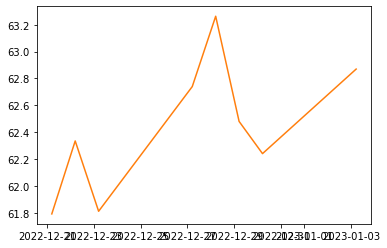

In [121]:
plt.plot(df_history_tte['Open'].rolling(30).mean())
plt.plot(df_history_tte['Open'])

In [122]:
rolling_tte = rolling_mean(df_history_tte, 'Open', 20, save = False)

plt.plot(rolling_tte)
plt.plot(df_history_tte['Open'])

TypeError: rolling_mean() got an unexpected keyword argument 'save'

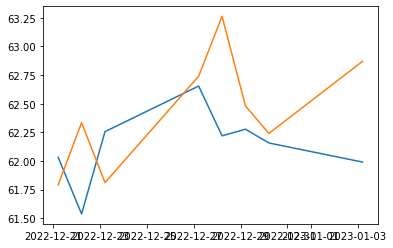

In [123]:
plt.plot(typical_price(df_history_tte, True))
plt.plot(df_history_tte['Open'])

In [124]:
df_history_tte

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Typical Price
Date,,,,,,,,
2022-12-21 00:00:00-05:00,61.790768,62.423407,61.266867,62.403637,1471100,0.000,0.0,62.031304
2022-12-22 00:00:00-05:00,62.334444,62.364097,60.802275,61.444798,1122400,0.000,0.0,61.537057
2022-12-23 00:00:00-05:00,61.810539,62.512373,61.771002,62.482716,930800,0.000,0.0,62.255364
2022-12-27 00:00:00-05:00,62.739725,63.085697,62.225708,62.650761,963300,0.000,0.0,62.654055
2022-12-28 00:00:00-05:00,63.263624,63.283391,61.602954,61.771000,1169600,0.000,0.0,62.219115
2022-12-29 00:00:00-05:00,62.480000,62.750000,61.919998,62.160000,1459400,0.719,0.0,62.276666
2022-12-30 00:00:00-05:00,62.240002,62.680000,61.709999,62.080002,1032000,0.000,0.0,62.156667
2023-01-03 00:00:00-05:00,62.869999,63.110001,61.419998,61.439999,1876900,0.000,0.0,61.989999


hello


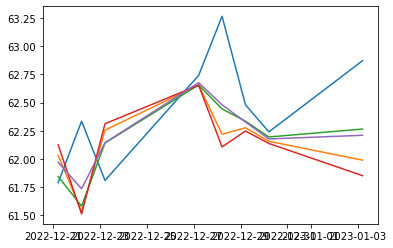

In [125]:
plt.plot(df_history_tte['Open'])
plt.plot(typical_price(df_history_tte, save = True))
plt.plot(median_price(df_history_tte, save = True))
plt.plot(weight_close(df_history_tte, save = True))
plt.plot(total_price(df_history_tte, save = True))

In [118]:
df_history_tte

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Typical Price,Median Price,Weight Close,Total Price
Date,,,,,,,,,,,
2021-12-21 00:00:00-05:00,45.539922,46.596637,45.539922,46.449615,2027100,0.000,0.0,46.195391,46.068279,46.258947,46.031524
2021-12-22 00:00:00-05:00,46.128007,46.798792,45.879908,46.605827,1354500,0.000,0.0,46.428176,46.339350,46.472589,46.353134
2021-12-23 00:00:00-05:00,46.844732,47.166344,46.789598,46.936623,1046700,0.000,0.0,46.964188,46.977971,46.957297,46.934324
2021-12-27 00:00:00-05:00,46.559878,46.918246,46.366913,46.872299,1149900,0.000,0.0,46.719153,46.642580,46.757440,46.679334
2021-12-28 00:00:00-05:00,47.010135,47.157157,46.807979,47.065269,1031500,0.000,0.0,47.010135,46.982568,47.023919,47.010135
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27 00:00:00-05:00,62.739725,63.085697,62.225708,62.650761,963300,0.000,0.0,62.654055,62.655702,62.653231,62.675473
2022-12-28 00:00:00-05:00,63.263624,63.283391,61.602954,61.771000,1169600,0.000,0.0,62.219115,62.443172,62.107086,62.480242
2022-12-29 00:00:00-05:00,62.480000,62.750000,61.919998,62.160000,1459400,0.719,0.0,62.276666,62.334999,62.247499,62.327499
